### Load Dataset

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

### 데이터 분할 및 전처리

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


### Deep Learning Modeling

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training & Test

In [5]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 10)
score = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3891 - accuracy: 0.8867 - val_loss: 0.1712 - val_accuracy: 0.9522
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2055 - accuracy: 0.9387 - val_loss: 0.1284 - val_accuracy: 0.9621
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1616 - accuracy: 0.9520 - val_loss: 0.1125 - val_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.9579 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9618 - val_loss: 0.0942 - val_accuracy: 0.9717
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9635 - val_loss: 0.0906 - val_accuracy: 0.9735
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1061 - accuracy: 0.9680 - val_loss: 0.0869 - val_accuracy

In [6]:
print('손실오차(loss) : {:.0%}'.format(score[0]))
print('정확도(Accuracy): {:.0%}'.format(score[1]))

손실오차(loss) : 8%
정확도(Accuracy): 98%


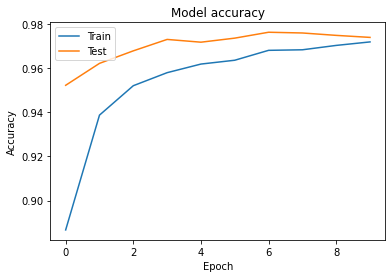

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

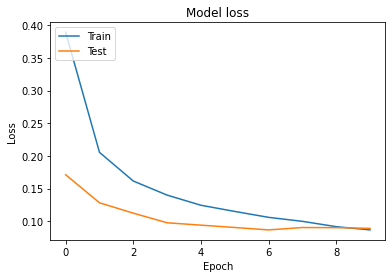

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()